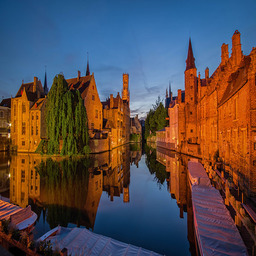

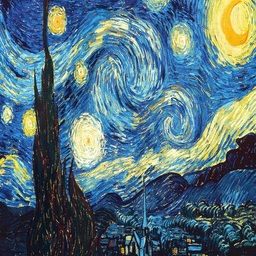

In [5]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images
from multiprocessing import Process

# read image files
img1 = Image.open('1.jpg')
img2 = Image.open('2.jpg')
#     img1.show()
#     img2.show()
#     imshow(np.asarray(img1))
#     imshow(np.asarray(img2))

display(img1)
display(img2)



In [6]:
def img2cell(images, row_num=1, col_num=1, margin_syn=2):
    [num_images, image_size] = images.shape[0:2]
    num_cells = int(math.ceil(num_images / (col_num * row_num)))
    cell_image = np.zeros((num_cells, row_num * image_size + (row_num-1)*margin_syn,
                           col_num * image_size + (col_num-1)*margin_syn, 3))
    for i in range(num_images):
        cell_id = int(math.floor(i / (col_num * row_num)))
        idx = i % (col_num * row_num)
        ir = int(math.floor(idx / col_num))
        ic = idx % col_num
        temp = clip_by_value(np.squeeze(images[i]), -1, 1)
        temp = (temp + 1) / 2 * 255
        temp = clip_by_value(np.round(temp), min=0, max=255)
        gLow = np.min(temp, axis=(0, 1, 2))
        gHigh = np.max(temp, axis=(0, 1, 2))
        temp = (temp - gLow) / (gHigh - gLow)
        cell_image[cell_id, (image_size+margin_syn)*ir:image_size + (image_size+margin_syn)*ir,
                    (image_size+margin_syn)*ic:image_size + (image_size+margin_syn)*ic,:] = temp
    return cell_image



img2cell(img1)



AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [11]:
from glob import glob

dataA = glob('./*.jpg')
print(len(dataA))
print(dataA[0])

2
.\1.jpg


In [ ]:
import cv2

img = cv2.imread("1.jpg", 0)
width = img.shape[1]
heigt = img.shape[0]
mean = cv2.mean(img)[0]

In [ ]:
dataA = glob('./*.jpg')
dataB = glob('./datasets/{}/*.*'.format(self.dataset_dir + '/trainB'))
np.random.shuffle(dataA)
np.random.shuffle(dataB)
batch_idxs = min(min(len(dataA), len(dataB)), args.train_size) // self.batch_size
lr = args.lr if epoch < args.epoch_step else args.lr*(args.epoch-epoch)/(args.epoch-args.epoch_step)

test_dataA = glob('./datasets/{}/*.*'.format(self.dataset_dir + '/testA'))
test_dataB = glob('./datasets/{}/*.*'.format(self.dataset_dir + '/testB'))
test_batch_files = list(zip(test_dataA[:self.batch_size], test_dataB[:self.batch_size]))
test_sample_images = [load_train_data(batch_file, is_testing=True) for batch_file in test_batch_files]
test_sample_images = np.array(test_sample_images).astype(np.float32)

(256, 256)


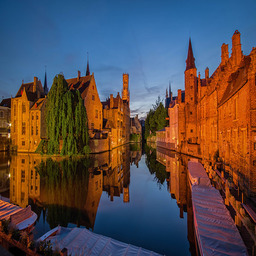

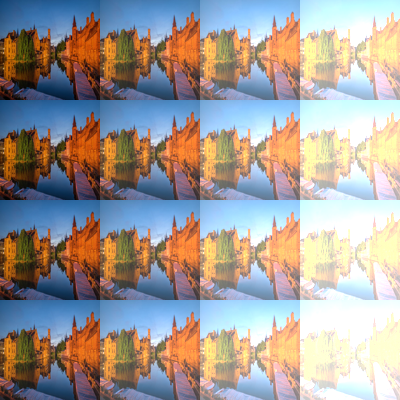

In [25]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images

#opens an image:
im = Image.open("1.jpg")
#creates a new empty image, RGB mode, and size 400 by 400.

# width, height = im.size
print(im.size)
display(im)

new_im = Image.new('RGB', (400,400))

#Here I resize my opened image, so it is no bigger than 100,100
im.thumbnail((100,100))
#Iterate through a 4 by 4 grid with 100 spacing, to place my image
for i in range(0,500,100):
    for j in range(0,500,100):
        #I change brightness of the images, just to emphasise they are unique copies.
        im=Image.eval(im,lambda x: x+(i+j)/30)
        #paste the image at location i,j:
        new_im.paste(im, (i,j))

# new_im.show()
display(new_im)

In [21]:
#Evan Russenberger-Rosica
#Create a Grid/Matrix of Images
import PIL, os, glob
from PIL import Image
from math import ceil, floor

PATH = "./"

frame_width = 1920
images_per_row = 5
padding = 2

os.chdir(PATH)

images = glob.glob("*.jpg")
images = images[:30]                #get the first 30 images

img_width, img_height = Image.open(images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

new_im.show()
new_im.save("out.jpg", "JPEG", quality=80, optimize=True, progressive=True)

0 0
385 0


# PIL usage
https://stackoverflow.com/questions/10647311/how-do-you-merge-images-into-a-canvas-using-pil-pillow